In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 11)

In [47]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [44]:
df['z'].max()

31.8

In [4]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(53940, 11)

In [7]:
df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)

In [8]:
df.shape

(53920, 11)

In [9]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [12]:
import matplotlib.pyplot as plt
import seaborn as snp

In [13]:
num_col = df.select_dtypes(include=['int64','float64'])

<Axes: >

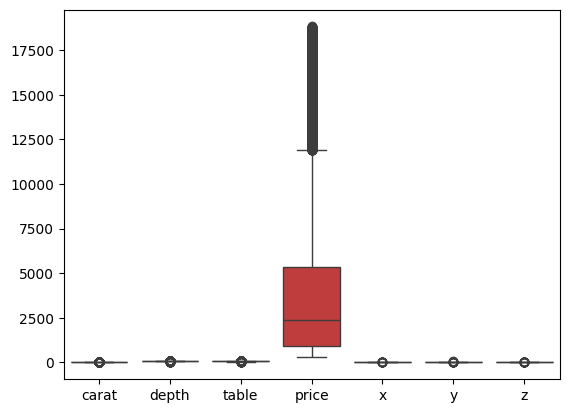

In [14]:
snp.boxplot(num_col)

In [15]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    outliers = ((df[column] < (Q1 - threshold * IQR)) | (df[column] > (Q3 + threshold * IQR)))
    return df[~outliers]

In [16]:
cleaned_num_col = num_col.copy()  # Create a copy of num_col to avoid modifying the original DataFrame
for column in num_col.columns:
    cleaned_num_col = remove_outliers_iqr(cleaned_num_col, column)

In [17]:
df.update(cleaned_num_col)

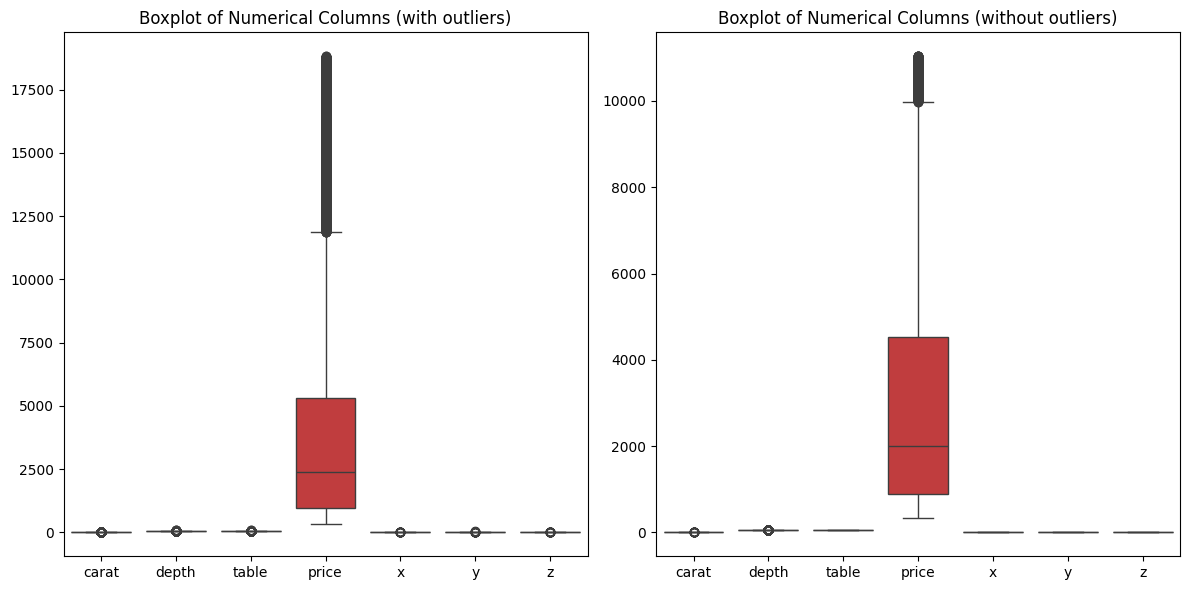

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
snp.boxplot(data=num_col, orient='v')
plt.title('Boxplot of Numerical Columns (with outliers)')
plt.subplot(1, 2, 2)
snp.boxplot(data=cleaned_num_col, orient='v')
plt.title('Boxplot of Numerical Columns (without outliers)')
plt.tight_layout()
plt.show()

In [19]:
x = df[['carat','cut','color','clarity','depth','table','x','y','z']]
y = df['price']

In [20]:
from sklearn.model_selection import train_test_split 

In [21]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34) 

In [22]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import r2_score 

In [23]:
ohe=OneHotEncoder() 
ohe.fit(x[['cut','color','clarity']]) 

OneHotEncoder()

In [24]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['cut','color','clarity']),remainder='passthrough') 

In [25]:
lr=LinearRegression() 

In [26]:
pipe=make_pipeline(column_trans,lr) 

In [27]:
pipe.fit(X_train,y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
                                                                            array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
                                                                            array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('linearregression', LinearRegression())])

In [28]:
y_pred=pipe.predict(X_test) 

In [29]:
r2_score(y_test,y_pred) 

0.9203723829508179

In [30]:
pipe.score(X_train,y_train)

0.920025436866551

In [31]:
pipe.predict(X_train)

array([5763.3125 , 8515.625  , 1931.78125, ..., 1964.25   , 2146.21875,
       5081.5625 ])

In [32]:
x.head(1)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43


In [33]:
pred_data = pd.DataFrame([['0.23','Ideal','E','SI2','61.5','55.0','3.95','3.98','2.43']],columns=['carat','cut','color','clarity','depth','table','x','y','z'])

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
pipe.predict(pred_data)

array([-1265.71875])

In [36]:
import pickle as pk 

In [37]:
pk.dump(pipe,open('model.pkl','wb')) 

In [38]:
pk.dump(scaler,open("scaler.pkl",'wb')) 

In [39]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)